In [3]:
import requests 
import json
import os
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import json_normalize
import time

In [5]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [8]:
df = pd.read_csv("nolan.csv",encoding = "ISO-8859-1")

In [9]:
df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0154506,Following,Following,1998,2000-08-25,"Crime, Mystery, Thriller",69,UK,English,Christopher Nolan,...,"Jeremy Theobald, Alex Haw, Lucy Russell, John ...",A young writer who follows strangers for mater...,7.5,84550,$ 6000,$ 48482,$ 48482,60.0,208.0,137.0
1,tt0209144,Memento,Memento,2000,2001-01-19,"Mystery, Thriller",113,USA,English,Christopher Nolan,...,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",A man with short-term memory loss attempts to ...,8.4,1098879,$ 9000000,$ 25544867,$ 39970386,80.0,2278.0,213.0
2,tt0278504,Insomnia,Insomnia,2002,2002-11-08,"Drama, Mystery, Thriller",118,"USA, UK",English,Christopher Nolan,...,"Al Pacino, Martin Donovan, Oliver 'Ole' Zemen,...",Two Los Angeles homicide detectives are dispat...,7.2,269304,$ 46000000,$ 67355513,$ 113758770,78.0,694.0,113.0
3,tt0372784,Batman Begins,Batman Begins,2005,2005-06-17,"Action, Adventure",140,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Michael Caine, Liam Neeson, Ka...","After training with his mentor, Batman begins ...",8.2,1278075,$ 150000000,$ 206852432,$ 373654966,70.0,2911.0,324.0
4,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,9.0,2241615,$ 185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0
5,tt0482571,The Prestige,The Prestige,2006,2006-12-22,"Drama, Mystery, Sci-Fi",130,"UK, USA",English,Christopher Nolan,...,"Hugh Jackman, Christian Bale, Michael Caine, P...","After a tragic accident, two stage magicians e...",8.5,1155723,$ 40000000,$ 53089891,$ 109676311,66.0,1422.0,363.0
6,tt0816692,Interstellar,Interstellar,2014,2014-11-06,"Adventure, Drama, Sci-Fi",169,"USA, UK, Canada",English,Christopher Nolan,...,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",A team of explorers travel through a wormhole ...,8.6,1449256,$ 165000000,$ 188020017,$ 696742056,74.0,4100.0,625.0
7,tt1345836,Il cavaliere oscuro - Il ritorno,The Dark Knight Rises,2012,2012-08-29,"Action, Adventure",164,"UK, USA","English, Arabic",Christopher Nolan,...,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",Eight years after the Joker's reign of anarchy...,8.4,1480582,$ 250000000,$ 448139099,$ 1081133191,78.0,3004.0,547.0
8,tt1375666,Inception,Inception,2010,2010-09-24,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,...,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,8.8,2002816,$ 160000000,$ 292576195,$ 869784991,74.0,3927.0,473.0
9,tt5013056,Dunkirk,Dunkirk,2017,2017-08-31,"Action, Drama, History",106,"UK, Netherlands, France, USA","English, French, German",Christopher Nolan,...,"Fionn Whitehead, Damien Bonnard, Aneurin Barna...","Allied soldiers from Belgium, the British Empi...",7.9,531422,$ 100000000,$ 189740665,$ 526949403,94.0,2399.0,624.0


In [11]:
df['budget'] = df['budget'].apply(cl.cambioBudget)

In [12]:
df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0154506,Following,Following,1998,2000-08-25,"Crime, Mystery, Thriller",69,UK,English,Christopher Nolan,...,"Jeremy Theobald, Alex Haw, Lucy Russell, John ...",A young writer who follows strangers for mater...,7.5,84550,6000,$ 48482,$ 48482,60.0,208.0,137.0
1,tt0209144,Memento,Memento,2000,2001-01-19,"Mystery, Thriller",113,USA,English,Christopher Nolan,...,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",A man with short-term memory loss attempts to ...,8.4,1098879,9000000,$ 25544867,$ 39970386,80.0,2278.0,213.0
2,tt0278504,Insomnia,Insomnia,2002,2002-11-08,"Drama, Mystery, Thriller",118,"USA, UK",English,Christopher Nolan,...,"Al Pacino, Martin Donovan, Oliver 'Ole' Zemen,...",Two Los Angeles homicide detectives are dispat...,7.2,269304,46000000,$ 67355513,$ 113758770,78.0,694.0,113.0
3,tt0372784,Batman Begins,Batman Begins,2005,2005-06-17,"Action, Adventure",140,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Michael Caine, Liam Neeson, Ka...","After training with his mentor, Batman begins ...",8.2,1278075,150000000,$ 206852432,$ 373654966,70.0,2911.0,324.0
4,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,9.0,2241615,185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0
5,tt0482571,The Prestige,The Prestige,2006,2006-12-22,"Drama, Mystery, Sci-Fi",130,"UK, USA",English,Christopher Nolan,...,"Hugh Jackman, Christian Bale, Michael Caine, P...","After a tragic accident, two stage magicians e...",8.5,1155723,40000000,$ 53089891,$ 109676311,66.0,1422.0,363.0
6,tt0816692,Interstellar,Interstellar,2014,2014-11-06,"Adventure, Drama, Sci-Fi",169,"USA, UK, Canada",English,Christopher Nolan,...,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",A team of explorers travel through a wormhole ...,8.6,1449256,165000000,$ 188020017,$ 696742056,74.0,4100.0,625.0
7,tt1345836,Il cavaliere oscuro - Il ritorno,The Dark Knight Rises,2012,2012-08-29,"Action, Adventure",164,"UK, USA","English, Arabic",Christopher Nolan,...,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",Eight years after the Joker's reign of anarchy...,8.4,1480582,250000000,$ 448139099,$ 1081133191,78.0,3004.0,547.0
8,tt1375666,Inception,Inception,2010,2010-09-24,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,...,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",A thief who steals corporate secrets through t...,8.8,2002816,160000000,$ 292576195,$ 869784991,74.0,3927.0,473.0
9,tt5013056,Dunkirk,Dunkirk,2017,2017-08-31,"Action, Drama, History",106,"UK, Netherlands, France, USA","English, French, German",Christopher Nolan,...,"Fionn Whitehead, Damien Bonnard, Aneurin Barna...","Allied soldiers from Belgium, the British Empi...",7.9,531422,100000000,$ 189740665,$ 526949403,94.0,2399.0,624.0


In [ ]:
#### ¿A más gasto, mejor valoración por parte de la audiencia?####

In [26]:
column_1 = df["budget"]
column_2 = df["metascore"]
correlation = column_1.corr(column_2)

In [27]:
print(correlation)

0.20361128261276984


[Text(0.5, 0, 'Cientos de millones'), Text(0, 0.5, 'Valoración')]

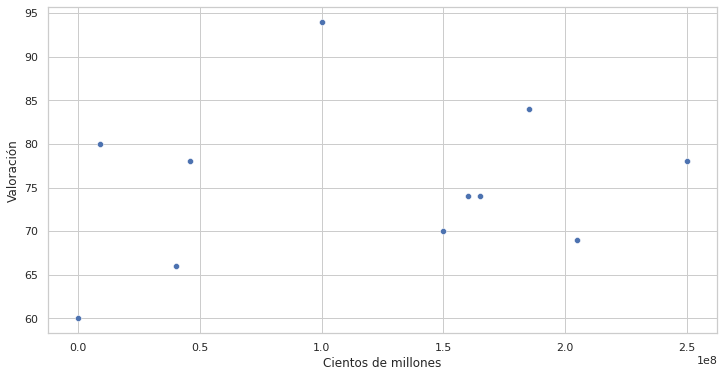

In [33]:
ax = sns.scatterplot(x="budget", y="metascore", data=df)
ax.set(xlabel='Cientos de millones', ylabel='Valoración')

In [ ]:
#No casi ninguna correlación entre el gasto y la metascore. Al menos, en las películas dirigidas por Cristopher Nolan
#La película de abajo a la derecha tiene un presupuesto de 6000 dólares, por eso aparece encima del cero.